In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# x são as imagens (imagens de números) e y são os labels (a resposta, qual número representa a imagem)
# x_train (imagens) e y_train (labels) treinam o algoritmo para ele aprender os padrões 
# x_test (imagens) e y_test (respostas corretas das imagens, não é a resposta do algoritmo) são usados para testar o algoritmo
# mnist -> banco de dados de imagens de números escritos com a sua label (resposta correta)
# mnist.load_data() -> carrega o banco de dados mnist e quando usado com x_train, y_train, x_test e y_test, ele atribui
# imagens (x) e o labels (y) de treino e teste

x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0
# reshape -> função do numpy que transforma o array para o formato que a rede esperam (imagem, altura, largura, canal)
# -1 -> o numpy calcula automaticamente o número de imagens que estão sendo importadas do mnist ( geralmente 60.000 para 
# x_train e 10.000 para x_test)
# 28, 28 -> altura e largura da imagem (28x28 pixels), cada pixel é um número entre 0 e 255 (branco e preto)
# 1 -> indica que a imagem é preto e branco (1 canal), se fosse colorida seriam 3 canais (RGB)
# /255 -> normaliza os valores dos pixels (facilita o aprendizado), 0 é branco, 1 é preto e 0,5 é um cinza (meio termo)


In [3]:
model = models.Sequential([
# camada entrada:
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
# camada oculta:
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
# camada saída:
    layers.Dense(10, activation='softmax')
])
# Sequential -> forma de criar uma rede neural, onde as camadas são empilhadas uma em cima da outra, formando uma “pilha” 
# linear de processamento dos dados

# camada de entrada: 
    # Conv2D (Convolucional 2D) -> processamento de imagens, onde a rede neural aprende a identificar padrões (números) nas imagens. 
    # 32 -> número de filtros que a camada vai aprender (32 padrões por imagem, como linha, borda, curva). 
    # (3, 3) -> tamanho do filtro que percorre toda a imagem para extrair padrões. 
    # activation='relu' -> define a função de ativação, no caso ReLU que ajuda a rede a aprender padrões complexos
    # input_shape -> indica o formato da entrada, no caso (28, 28, 1) que é a imagem de entrada (altura, largura e canais)
# camada oculta:
    # 1 - MaxPooling2D -> adiciona uma camada de pooling (manter apenas as informações mais importantes na imagem), o que ajuda a 
    # evitar overfitting e acelera o treinamento
    # (2,2) -> percorre a imagem com uma janela de 2x2 pixels, mantendo apenas o valor máximo de cada janela
    # 2 - Conv2D -> usado novamente para aprender os novos padrões depois do MaxPooling2D, porém agora ele tem 64 filtros 
    # 3 - MaxPooling2D -> deixa a rede mais eficiente e foca ainda mais nos padrões essenciais
    # 4 - Flatten -> Preparar os dados para a camada Dense, durante as camadas convolucionais e de pooling as saídas eram 3D (altura, largura e 
    # canais) e agora são 1D (dados achatados para uma sequência única de números, como um vetor) que é o formato que o Dense espera
    # 5 - Dense ->  combinar e processar os padrões extraídos pela camada oculta e preparando os dados para a saída
    # 128 -> número de neurônios que serão processados e cada um aprendendo um padrão diferente
    # activation -> define a função de ativação em cada neurônio, no caso ReLU 
# camada de saída:
    # Dense -> camada final que vai gerar a saída da rede neural, no caso 10 neurônios (um para cada número de 0 a 9), cada neurônio representa
    # a probabilidade do número da imagem ser aquele número
    # activation='softmax' -> transforma a saída desses 10 neurônios em probabilidades, assim o modelo escolhe o dígito com a maior probabilidade

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
)
# compile -> define (não chega a treinar) como o modelo vai aprender e avaliar o desempenho durante o treino e validação
# optimizer='adam' -> atualiza os pesos e viés (usa o erro medido no loss) para que o algoritmo aprenda a fazer previsões com menos erros
# loss='sparse_categorical_crossentropy' -> mede o erro do modelo para ajustar os pesos
# metrics['accuracy'] -> mede a acurácia (monitoramento), porcentagem de previsões corretas 

c:\Users\Nicolas\Downloads\tensorflow\.env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.1)
# fit -> treina o modelo com os dados de entrada
# epochs=5 -> o modelo vai repetir 5 vezes 
# batch_size=32 -> ao invés de passar todos os dados de uma vez para o modelo, ele vai processar 32 exemplos por vez (treinar de forma mais eficiente)
# validation_split=0.1 -> usa 10% do conjunto de treino para validar o modelo (durante o treinamento)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9009 - loss: 0.3204 - val_accuracy: 0.9838 - val_loss: 0.0552
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9858 - loss: 0.0474 - val_accuracy: 0.9888 - val_loss: 0.0401
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9907 - loss: 0.0304 - val_accuracy: 0.9905 - val_loss: 0.0341
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9930 - loss: 0.0214 - val_accuracy: 0.9905 - val_loss: 0.0331
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9948 - loss: 0.0153 - val_accuracy: 0.9907 - val_loss: 0.0355


In [5]:

test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Acurácia nos dados de teste: {test_acc}")
# evaluate -> passa os dados de teste e calcula o erro e a acurácia (usado depois que o modelo já foi treinado)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9886 - loss: 0.0338
Acurácia nos dados de teste: 0.9914000034332275


In [6]:
num_train_images = len(x_train)
# imagens no conjunto de treino
num_train_labels = len(y_train)
# rótulos no conjunto de treino
num_test_images = len(x_test)
# imagens no conjunto de teste
num_test_labels = len(y_test)
# rótulos no conjunto de treino

# Exibir as quantidades
print(f"Conjunto de Treino: {num_train_images} imagens, {num_train_labels} rótulos.")
print(f"Conjunto de Teste: {num_test_images} imagens, {num_test_labels} rótulos.")

Conjunto de Treino: 60000 imagens, 60000 rótulos.
Conjunto de Teste: 10000 imagens, 10000 rótulos.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


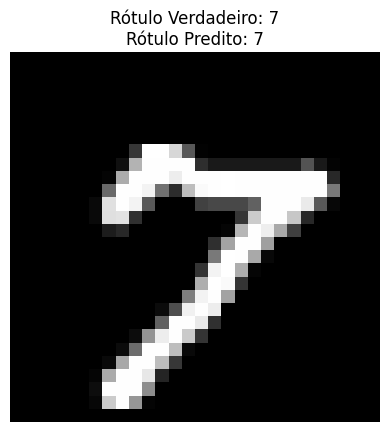

In [7]:
index = 9000
test_image = x_test[index:index+1]
# 3D (28, 28, 1) -> 28 de altura e largura em pixels e 1 seria em preto e branco, imagens coloridas em canal 3
# 4D (n, 28, 28, 1) -> n é o batch_size (grupo de exemplos usados usado de uma vez só para treinar o modelo)
# x_test é um array com várias imagens e se fizer x_test[index] vai retornar no formato 3D, porém o model.predict() espera no formato 4D
# por isso está fazendo o [index:index+1] o que seria 9000:9001 (retorna 1 elemento começando pelo index 9000) e o resultado vai ser um 4D
# no caso (1, 28, 28, 1)
true_label = y_test[index]
# y_test[index] -> o label da única imagem que vai ser usada no predict, o x_test e o y_test usados com o mesmo index retornam uma imagem 
# e a resposta dessa imagem 

# Fazer a predição com o modelo treinado
predicted_probabilities = model.predict(test_image)
# neste caso que usou o mnist, o modelo foi treinado para prever imagens com os dígitios de 0 a 9 (10 classes), na saída do modelo (Dense) definiu 10
# neurônios (cada um calcula a probabilidade do input pertencer a aquela classe) e o resultado é um array com 10 valores
# [0.01, 0.02, 0.00, 0.01, 0.00, 0.00, 0.01, 0.90, 0.02, 0.03] -> se o modelo ve uma imagem como 7
predicted_label = predicted_probabilities.argmax()
# retorna o índice do array com a maior probabilidade, no caso 7

# Exibir a imagem e os resultados
plt.imshow(x_test[index].reshape(28, 28), cmap='gray')
# imshow -> exibir imagens em formato de array, 2D preto e branco e 3D colorido
# x_test[index] -> está selecionando uma única imagem através do index
# .reshape(28, 28) -> transforma em um array 2D
# cmap='gray -> diz ao imshow para exibir imagens no tom cinza
plt.title(f"Rótulo Verdadeiro: {true_label}\nRótulo Predito: {predicted_label}")
# true_label -> resposta da imagem escolhida 
# predicted_label -> a resposta que o algoritmo preveu
plt.axis('off')
# Esconde as marcações dos eixos X e Y (números, linhas e ticks ao redor da imagem)
plt.show() 
# mostra resultados